# Imię i nazwisko


# Zaliczenie ćwiczeń z DataMining


## Zad1 


Będziesz używał następujących bibliotek:
- pandas (pd)
- numpy (np)
- matplotlib.pyplot (plt)
- seaborn (sns)

In [ ]:
# Kod załadowania twoich bibliotek
# ....

# dodatkowe ustawienia
plt.rc("font", size=14)
%matplotlib inline

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Zad 2 

Załaduj dane z pliku '01_heights_weights_genders.csv' do ramki danych.

In [ ]:
df = 

## Zad 3

Wyświetl kształt ramki danych

In [ ]:
df.

## zad 4

Wypisz nazwy kolumn ramki df

In [ ]:
df.

## zad 5

Wypisz 5 pierwszych i ostatnich wierszy danych 

In [ ]:
df. 

df.

## zad 6 

Stwórz nowe zmienne `wzrost` i `waga` zgodnie z przelicznikiem 2.54 dla Height oraz 0.454 dla Weight.
Dodaj nową zmienną `target`, którą stwórz na podstawie zmiennej `Gender`. Przypisz dla niej wartości 0 i 1 oraz przypisz jej typ `int`.

In [ ]:
df['wzrost'] = 
df['waga'] = 
df['target'] = 

## zad 7 

Wyświetl podstawowe statystyki nowo utworzonych zmiennych. Wyświetl liczebności zmiennej target.

In [ ]:
# Twoj kod 
# ....


sns.countplot(x='target',data=df, palette ='hls')
plt.show()

## zad 8 

Oblicz i wyświetl średni wzrost i wagę dla kobiet i mężczyzn

In [ ]:
df.

## zad 9 

Wyświetl histogramy zmiennych wzrost (bins = 10, 30, 100) i waga.

In [ ]:
from plotnine import *
from plotnine.data import *
from pandas.core import datetools

In [ ]:
ggplot(df,aes(x='wzrost'))+geom_histogram(binwidth=1)

In [ ]:
ggplot(df,aes(x='waga'))+geom_histogram(binwidth=1)

In [ ]:
ggplot(df,aes(x='waga'))+geom_density()+ labs(x = "Waga", y = "liczba")

In [ ]:
ggplot(df,aes(x='wzrost'))+geom_density()+ labs(x = "Wzrost", y = "liczba")

In [ ]:
df.groupby('target').Height.hist(bins=10)

In [ ]:
ggplot(df, aes(x = 'wzrost', fill = 'target'))+ geom_density() + labs(x = "Wzrost", y = "gęstość", fill = "Płeć")

In [ ]:
df.groupby('target').Weight.hist(bins=100)

# Regresja logistyczna

## Zad 10

Zacznij modelowanie danych regresją logistyczną. Jak pamiętasz potrzebne Ci do tego są następujące zmienne:
- y oznaczającą wartość docelową, którą będziesz modelować
- X oznaczającą macierz zmiennych na podstawie których model wykona estymację parametrów.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y = 
X = 

## Zad 11 podziel zbiór danych na zbiór trenigowy i testowy

In [ ]:
X_train, X_test, y_train, y_test = 

In [ ]:
# NASZ MODEL
logreg = LogisticRegression()
logreg.fit(X_train,y_train) # szukamy parametrów 
# ==========================
y_pred = logreg.predict(X_test) # przewidywanie dla zbioru testowego - Wartości
y_probability = logreg.predict_proba(X_test) # przewidywanie modelu - Prawdopodobieństwa

logreg.score(X_test,y_test) # ile udało się zamodelować ? 


In [ ]:
### Lepsza informacja o wynikach
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# DANE MNIST

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [5]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [7]:
X, y = mnist["data"], mnist["target"]

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

70000 obrazów z 784 cechami (28x28 pixeli z natężeniem szarości)

Zobacz przykład:

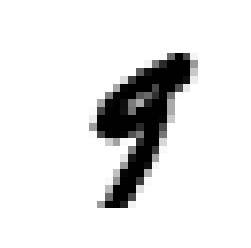

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_img = some_digit.reshape(28,28)

plt.imshow(some_digit_img, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [12]:
y[36000]

'9'

In [13]:
## Podziel zbiór
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [ ]:
# wymieszanie danych
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index],y_train[shuffle_index]


## Klasyfikacja binarna 

In [22]:
y_train = y_train.astype(np.int8)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [23]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42,tol=None)
sgd_clf.fit(X_train, y_train_5)

/Users/air/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
sgd_clf.predict([some_digit])

array([False])

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/Users/air/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/air/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/air/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset

array([0.9532 , 0.95125, 0.9625 ])

In [27]:
# niech zawsze przewidywanie będzie = to nie jest piątka ! :) 

from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)
    
never5clf = Never5Classifier()
cross_val_score(never5clf, X_train, y_train_5, cv=3, scoring='accuracy')


# 90% sukcesu ??

array([0.91125, 0.90855, 0.90915])

### NIE !!! sukcesem jest tylko to, że 90% danych to nie piątki 

## Macierz pomyłek 

In [30]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

/Users/air/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/air/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/air/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset

array([[52992,  1587],
       [ 1074,  4347]])

52992 sklasyfikowanych prawidlowo jako "nie 5" (PN) oraz 1587 nieprawidłowo przypisane jako 5 (FP)

1074 sklasyfikowane nieprawidłowo jako 5 (FN) oraz 4347 sklasyfikowane prawidłowo jako 5 (PP) 

Precyzja = PP/(PP+FP)

Pełność = PP/(PP+FN)



In [31]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred) # = 4347/(4347+1587)

0.7325581395348837

In [32]:
recall_score(y_train_5,y_train_pred)

0.8018815716657444

F1_score = 2/ (1/Precyzja)+(1/Pelność) = PP/ (PP+ (FN+FP/2))

Średnia Harmoniczna

In [33]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.765653896961691

In [35]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,cv=3, method='decision_function')
from sklearn.metrics import roc_curve
fpr, tpr, tresholds = roc_curve(y_train_5,y_scores)

/Users/air/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/air/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/air/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset

In [36]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('odsetek fałszywie pozytywnych')
    plt.ylabel('odsetek prawdziwie pozytytwnych')

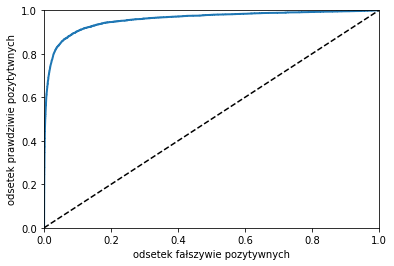

In [37]:
plot_roc_curve(fpr,tpr)

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9584692857783504

# ASB

In [39]:
!pip install Advanced-scorecard-builder

You should consider upgrading via the 'pip install --upgrade pip' command.


In [40]:
from AmaFree import AdvancedScorecardBuilder as asb

In [42]:
asb

AmaFree.asb.AdvancedScorecardBuilder

In [44]:
from sklearn import datasets
import pandas as pd
X,y = datasets.make_classification(n_samples=10**5, n_features=25, random_state=123)
print(X.shape)
# Data Frame
names = []
for el in range(25):
    names.append("zm"+str(el+1))
df = pd.DataFrame(X, columns=names)
df['target'] = y
# take asb object
ama = asb(df,'target')
# fit your model
ama.fit()
# get model informations
ama.model_info_

(100000, 25)
zm1
zm2
zm3
zm4
zm5
zm6
zm7
zm8
zm9
zm10
zm11
zm12
zm13
zm14
zm15
zm16
zm17
zm18
zm19
zm20
zm21
zm22
zm23
zm24
zm25


/Users/air/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/air/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/air/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/air/Desktop/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'coef': {'zm13': 0.87281761713455,
  'zm14': 0.4817260835063838,
  'zm17': 0.4676454037506174},
 'p_value': {'zm13': 0.0, 'zm14': 0.0, 'zm17': 0.0},
 'features': ['zm13', 'zm14', 'zm17'],
 'model': 'LogisticRegressionCV',
 'gini': 0.954595171744715,
 'acc': 0.9325666666666667,
 'Precision': 0.9284910282725286,
 'Recall': 0.9369905118268075,
 'F1': 0.9327214074295787,
 'intercept': array([0.23107566])}

In [45]:
# get scorecard
ama.get_scorecard()

,label,variable,score
0,(not missing) and zm13 <= -0.305,zm13,51
1,-0.305 < zm13 <= -0.122,zm13,105
2,-0.122 < zm13 <= 0.255,zm13,133
3,0.255 < zm13,zm13,171
4,0.201 < zm14,zm14,51
5,-0.294 < zm14 <= 0.201,zm14,75
6,-0.713 < zm14 <= -0.294,zm14,95
7,(not missing) and zm14 <= -0.713,zm14,140
8,0.402 < zm17,zm17,51
9,-0.176 < zm17 <= 0.402,zm17,78


In [46]:
# and produce report file
ama.html_report('raport.html')